Forecast the CocaCola prices and Airlines Passengers data set.

Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. 

Finally which model you will use for Forecasting.

# Coca-Cola Data set

In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data

In [4]:
coca = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
coca.shape

(42, 2)

In [6]:
#Plotting sales

<AxesSubplot:>

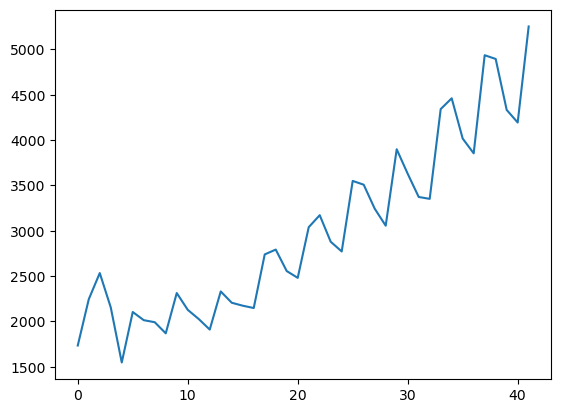

In [7]:
coca.Sales.plot()

In [8]:
##extracting information about quarters and years from the 'Quarter' column in your DataFrame 'coca'. You are creating new columns 'Quarters' and 'Years' to store this information

In [9]:
coca['Quarters'] = 0
coca['Years'] = 0
for i in range(len(coca)):
    p=coca['Quarter'][i]
    coca['Quarters'][i] = p[0:2]
    coca['Years'][i] = p[3:5]

In [10]:
coca

,Quarter,Sales,Quarters,Years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [11]:
## creating dummy variables and then concatenating these dummy variables back to your original DataFrame

In [12]:
Quarter_dummies = pd.DataFrame(pd.get_dummies(coca['Quarters']))
coca = pd.concat([coca,Quarter_dummies],axis=1)
coca                               

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [13]:
##using Matplotlib creating a line plot of the 'Sales' column

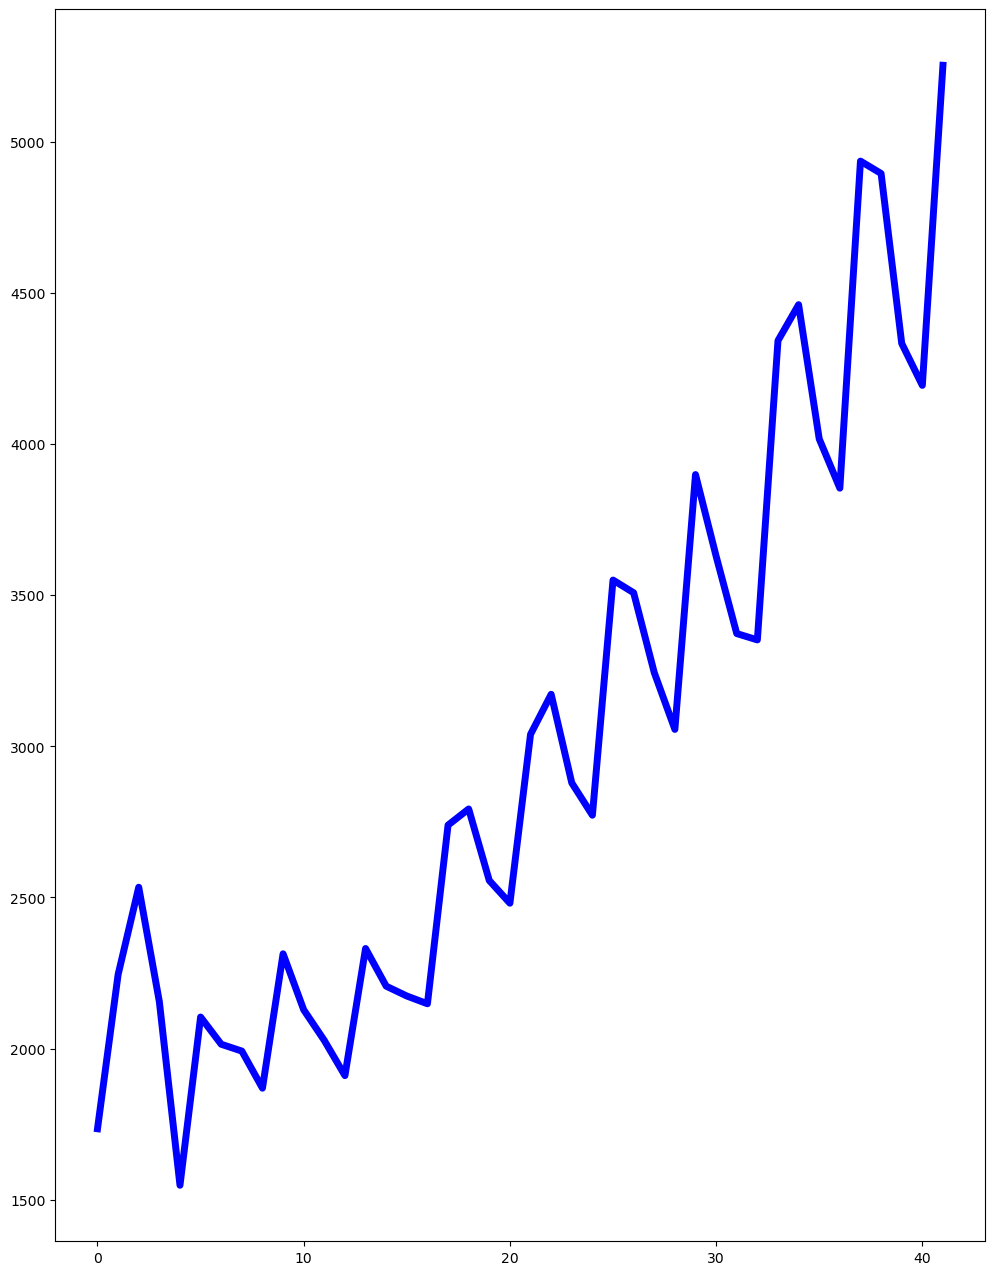

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,16))
plt.plot(coca['Sales'], color='blue', linewidth = 5)

In [15]:
##using Seaborn to create a line plot of the 'Sales' data over the years

<AxesSubplot:xlabel='Years', ylabel='Sales'>

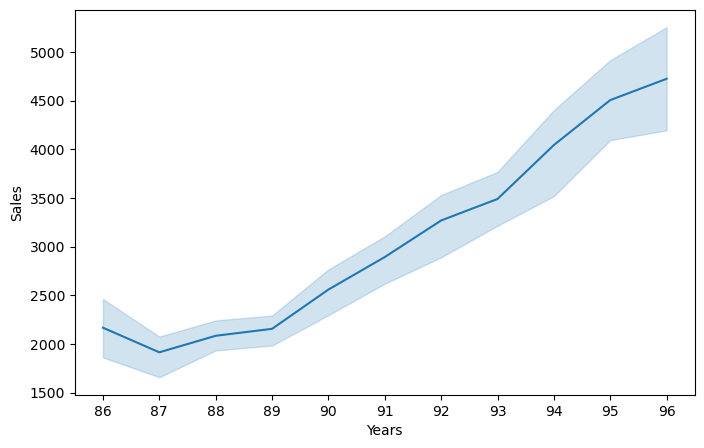

In [16]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.lineplot(x = 'Years', y= 'Sales',data = coca)

In [17]:
##plot the (ACF) and (PACF) for the 'Sales' column 

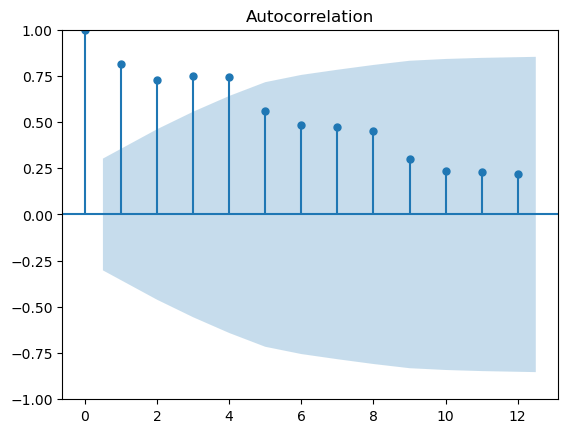

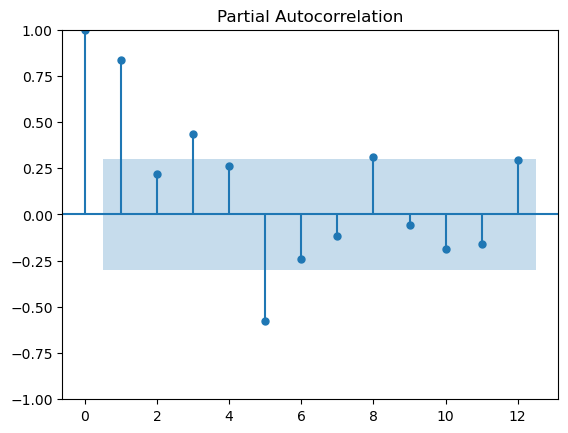

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca.Sales, lags = 12)
tsa_plots.plot_pacf(coca.Sales, lags = 12)
plt.show()

In [19]:
##create a boxplot to visualize the distribution of 'Sales' 

<AxesSubplot:xlabel='Years', ylabel='Sales'>

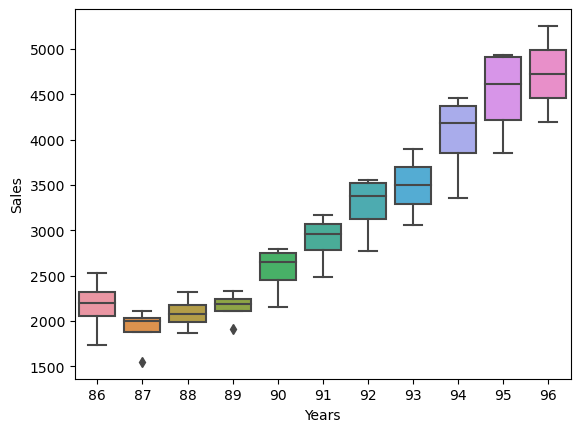

In [20]:
sns.boxplot(x='Years', y = 'Sales', data = coca)

In [21]:
#create a boxplot to visualize the distribution of 'Sales' 

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

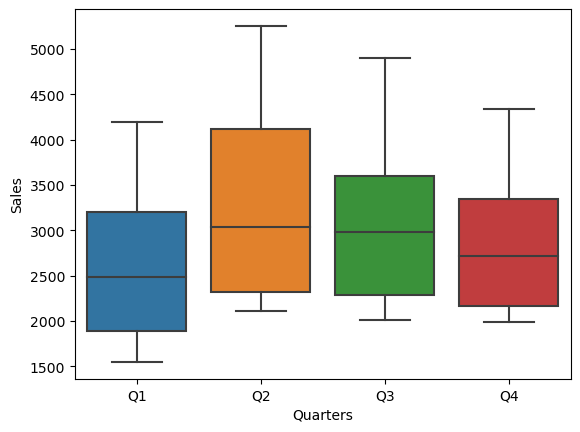

In [22]:
sns.boxplot(x='Quarters', y='Sales', data = coca)

In [23]:
##creating a heatmap using Seaborn to visualize the sales data across different quarters and years

<AxesSubplot:xlabel='Quarters', ylabel='Years'>

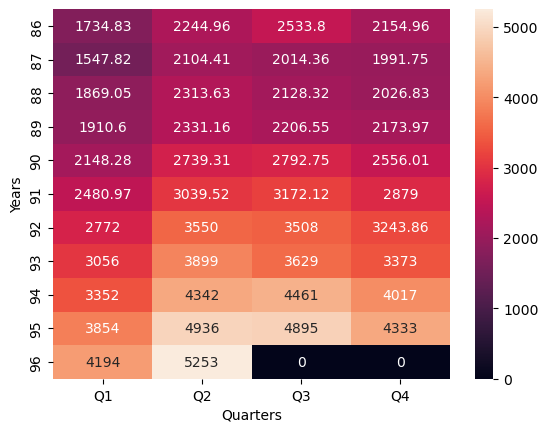

In [24]:
heatmap_coca = pd.pivot_table(index = 'Years', columns = 'Quarters', values = 'Sales',data = coca, fill_value=0)
sns.heatmap(heatmap_coca,annot=True, fmt = 'g')

In [25]:
##splitting your DataFrame 'coca' into training and test sets

In [26]:
train= coca.head(32)
test=coca.tail(10)

In [27]:
## creating a line plot to visualize the original 'Sales' data and its rolling means using a window size of 2, 4, and 6.

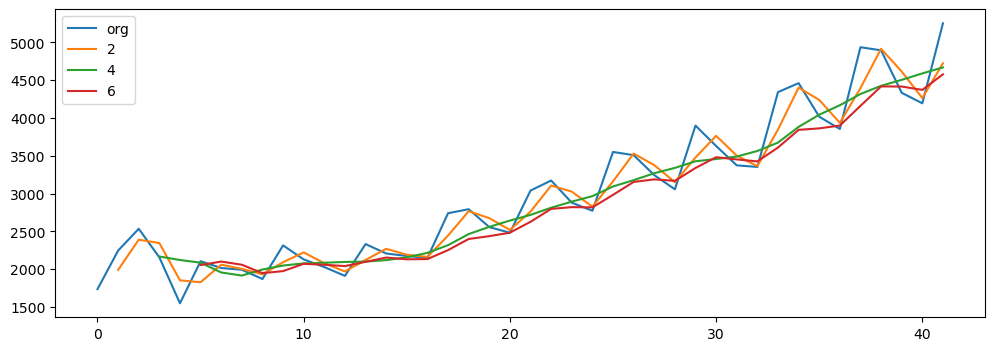

In [28]:
plt.figure(figsize=(12,4))
coca.Sales.plot(label='org')
for i in range(2,8,2):
    coca['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

In [29]:
##decompose the 'Sales' time series data into its trend, seasonal, and residual components and visualize the data

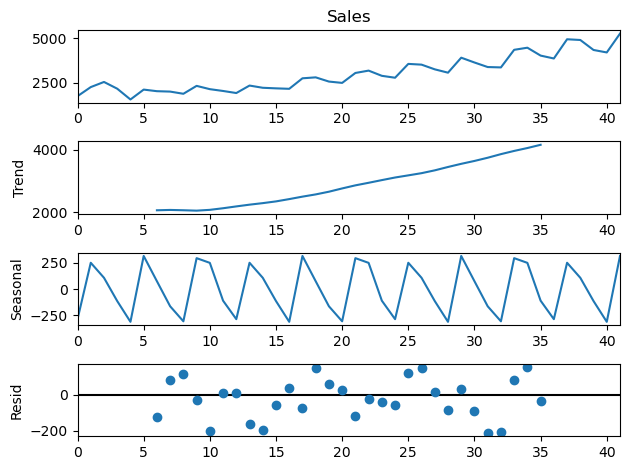

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts = seasonal_decompose(coca.Sales,period=12)
decompose_ts.plot()
plt.show()

In [31]:
##calculates the root mean squared error between the original and predicted values.

In [32]:
def rmse(org,pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [33]:
## calculates the Mean Absolute Percentage Error between predicted and actual values.

In [34]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method


In [35]:
##fit a SES model to your training data and making predictions on the test set  and calculating both MAPE and RMSE

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = test.index[0], end= test.index[-1])
print("MAPE is : ",MAPE(pred_ses,test.Sales))
rmse_sem = rmse(test.Sales,pred_ses)
rmse_sem

MAPE is :  22.724050894845657


1172.1756106651035

# Holt Method

In [37]:
##fit a Holt model to your training data and making predictions on the test set and calculating both MAPE and RMSE

In [38]:
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(train['Sales']).fit(smoothing_level = 0.8,smoothing_slope = 0.2)
pred_hw = hw_model.predict(start=test.index[0], end=test.index[-1])
print('MAPE is : ',MAPE(pred_hw,test.Sales))
rmse_h = rmse(test.Sales,pred_hw)

MAPE is :  16.720651408891925


# Holts winter exponential smoothing with additive seasonality and additive trend

In [39]:
##Exponential Smoothing method fitting a model to your training data and making predictions on the test set and calculating both MAPE and RMSE 

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal='add', trend = 'add', seasonal_periods = 12).fit()
pred_hwe = hwe_model_add_add.predict(start = test.index[0], end=test.index[-1])
print('MAPE is : ',MAPE(pred_hwe,test.Sales))
rmse_haa=rmse(test.Sales,pred_hwe)

MAPE is :  14.21862979467897


# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [41]:
##Exponential Smoothing method fitting a model to your training data and making predictions on the test set and calculating both MAPE and RMSE 

In [42]:
hwe_model_mul_add = ExponentialSmoothing(train['Sales'],seasonal = 'mul',trend = 'add', seasonal_periods = 12).fit()
pred_hma = hwe_model_mul_add.predict(start=test.index[0], end=test.index[-1])
print('MAPE is : ',MAPE(pred_hma,test.Sales))
rmse_hma = rmse(test.Sales,pred_hma)
rmse_hma

MAPE is :  14.20013261263708


681.5431586875204

In [43]:
coca['t']=np.arange(len(coca))
coca['t_squared']= coca['t']*coca['t']
coca['log_sales'] = np.log(coca['Sales'])
coca.head()

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,4,16,7.344602


In [44]:
train = coca.head(32)
test = coca.tail(10)

# Linear Model

In [45]:
##fitting a linear regression model to your training data and then making predictions on your test data.Finally calculate and print the RMSE

In [46]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear_model = rmse(test.Sales, pred_linear)
rmse_linear_model

752.9233932767115

# Exponential Model

In [47]:
## fitting an exponential model and calculate RMSE

In [48]:
exp = smf.ols('log_sales~t',data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = rmse(test['Sales'],np.exp(pred_exp))
rmse_exp

590.3316432076567

# Quadratic Model

In [49]:
##fitting a quadratic model and calculate RMSE 

In [50]:
Quad = smf.ols("Sales~t+t_squared",data=train).fit()
pred_quad = pd.Series(Quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = rmse(test.Sales,pred_quad)
rmse_quad

457.7357355407391

# Additive Seasonality Model

In [51]:
##fitting a Additive Seasonality model and calculate RMSE 

In [52]:
add_model = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add = pd.Series(add_model.predict(pd.DataFrame(test[['Q1','Q2','Q3']])))
rmse_add = rmse(test.Sales,pred_add)
rmse_add

1850.466546185836

# Additive Seasonality Quadratic Model

In [53]:
##fitting a Additive Seasonality Quadratic model and calculate RMSE 

In [54]:
adqm_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3', data = train).fit()
pred_adqm = pd.Series(adqm_model.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3']])))
rmse_adqm = rmse(test.Sales,pred_adqm)
rmse_adqm

277.35107711243114

# Multiplicative Seasoanlity Model

In [55]:
##fitting a  Multiplicative Seasonality model and calculate RMSE 

In [56]:
msm_model = smf.ols("log_sales~Q1+Q2+Q3",data = train).fit()
pred_msm = pd.Series(msm_model.predict(test))
rmse_msm = rmse(test.Sales,np.exp(pred_msm))
rmse_msm

1908.2503948361164

# Multiplicative Additive Seasonality Model

In [57]:
##fitting a Multiplicative Additive Seasonality model and calculate RMSE 

In [58]:
mul_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3', data = train).fit()
pred_mas = pd.Series(mul_add_sea.predict(test))
rmse_mas = rmse(test.Sales,np.exp(pred_mas))
rmse_mas

448.8678182691475

In [59]:
model = {'Model': pd.Series(['Simple Exponential Method','Holt Method','HW exp smoothing add','HW exp smoothing mul','Linear Model','Exp Model','Quadratic Model','Add Seasonality','Quad add seasonality','Multi Seasonality','Multi add seasonality']),
        'RMSE_Values': pd.Series([rmse_sem,rmse_h,rmse_haa,rmse_hma,rmse_linear_model,rmse_exp,rmse_quad,rmse_add,rmse_adqm,rmse_msm,rmse_mas])}

In [60]:
model = pd.DataFrame(model)

In [61]:
model.sort_values('RMSE_Values')

,Model,RMSE_Values
8,Quad add seasonality,277.351077
10,Multi add seasonality,448.867818
6,Quadratic Model,457.735736
5,Exp Model,590.331643
3,HW exp smoothing mul,681.543159
2,HW exp smoothing add,719.239791
4,Linear Model,752.923393
1,Holt Method,888.779885
0,Simple Exponential Method,1172.175611
7,Add Seasonality,1850.466546


# Building Final model with least RMSE value

In [62]:
##fitting a final model using the ordinary least squares (OLS) method to your entire dataset and calculating the RMSE

In [63]:
final_model = smf.ols("Sales~t+t_squared+Q1+Q2+Q3",data = coca).fit()
pred_final= pd.Series(final_model.predict(pd.DataFrame(coca[['Q1','Q2','Q3','t','t_squared']])))
rmse_final_model = rmse(coca.Sales,pred_final)
rmse_final_model

159.0552257652248

In [64]:
pred_df = pd.DataFrame({'Actual': coca.Sales,'Predicted': pred_final})

In [65]:
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709
